In [1]:
import numpy as np
import modin.pandas as mipd
import os
import time
import pandas as pd
from tqdm import tqdm
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
time_resolution = '2week'

data_path = '/mnt/data0/proj_osgeo/data_ASF_trial/network_data'+time_resolution+'/'

c_path = './network_data'+time_resolution+'/commits/'
e_path = './network_data'+time_resolution+'/emails/'
mix_path = './network_data'+time_resolution+'/mix/'
#c_path = './network_data/commits/'

df_tech_overlaps = pd.read_csv("./tech_overlaps"+time_resolution+".csv")
df_social_overlaps = pd.read_csv("./social_overlaps"+time_resolution+".csv")
df_mix_overlaps = pd.read_csv("./mix_overlaps"+time_resolution+".csv")

projects = os.listdir(c_path)
project_names = [x.split('__')[0] for x in projects]
project_names_tech = pd.Series(project_names).drop_duplicates().values

projects = os.listdir(e_path)
project_names = [x.split('__')[0] for x in projects]
project_names_social = pd.Series(project_names).drop_duplicates().values

In [3]:
%matplotlib inline

In [4]:
def remove_minus(list):
    while -1.0 in list :
        list.remove(-1.0)
    return list

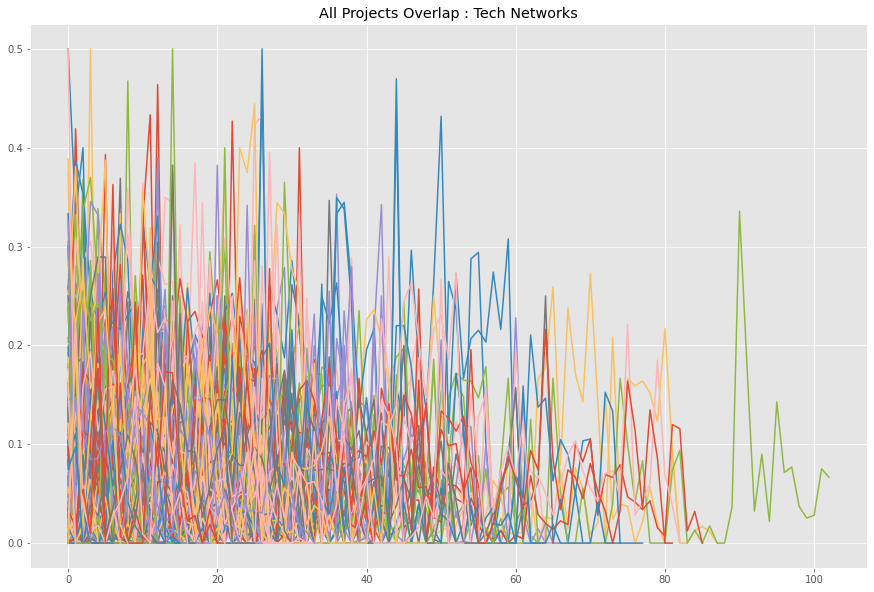

In [5]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

for col in df_tech_overlaps.columns:
    data = df_tech_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
    #print(data[:i])

    x = range(len(data[:i]))

    plt.plot(x,data[:i])
    plt.title("All Projects Overlap : Tech Networks")
    

<BarContainer object of 103 artists>

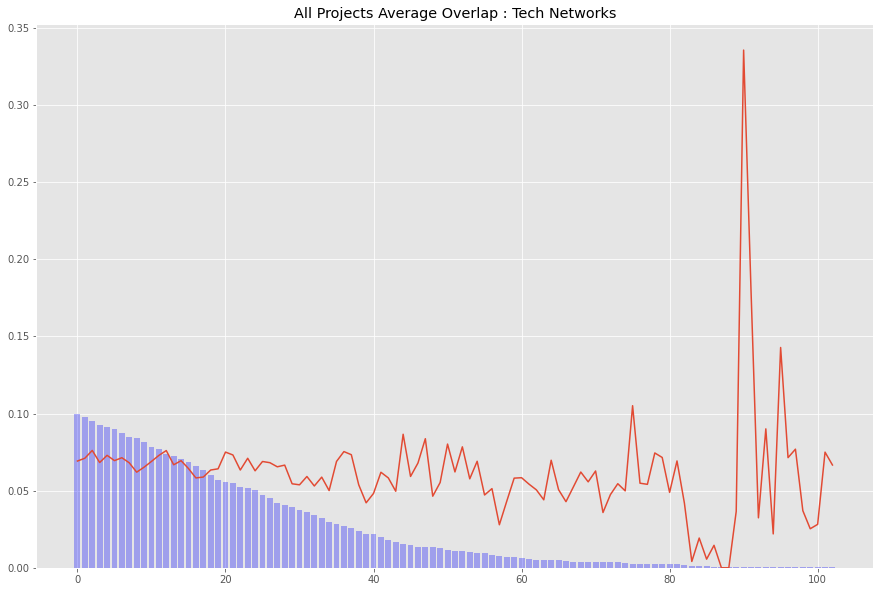

In [6]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_tech_overlaps.index))]
count = [0 for i in range(len(df_tech_overlaps.index))]

for col in df_tech_overlaps.columns:
    data = df_tech_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))

plt.plot(x,ave[:i])

plt.title("All Projects Average Overlap : Tech Networks")

#print(ave)
#print(count)
len(df_tech_overlaps.loc[0].values)
plt.bar(x,np.array(count[:i])/len(df_tech_overlaps.columns)/10, fc='b', alpha=0.3)
#plt.boxplot([df_tech_overlaps.loc[0].values], label=[0])

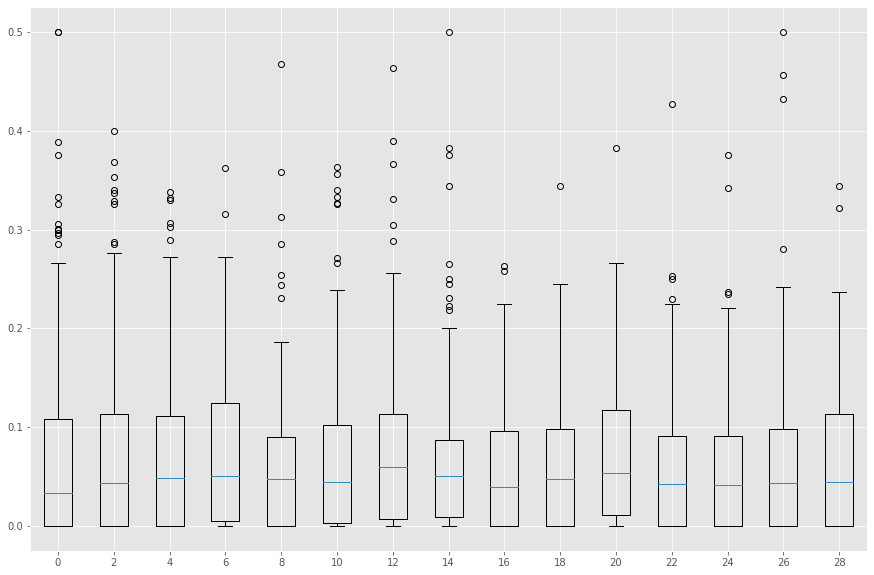

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t = []
labels_time = range(0,30,2)
for time in labels_time:
    data_thistime = df_tech_overlaps.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t.append(data_thistime)




plt.boxplot(datas_t, labels=labels_time)
plt.show()

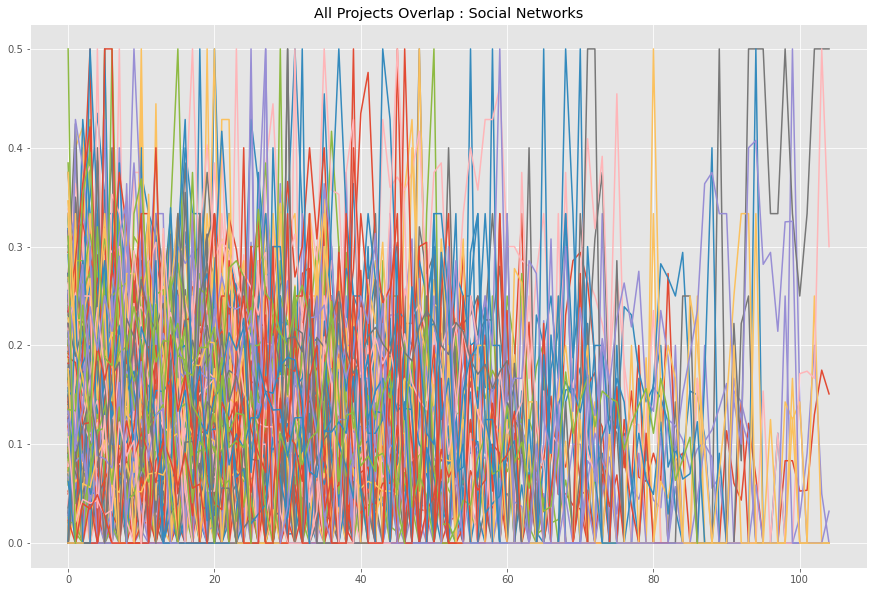

In [8]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

for col in df_social_overlaps.columns:
    data = df_social_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
    #print(data[:i])

    x = range(len(data[:i]))

    plt.plot(x,data[:i])
    plt.title("All Projects Overlap : Social Networks")

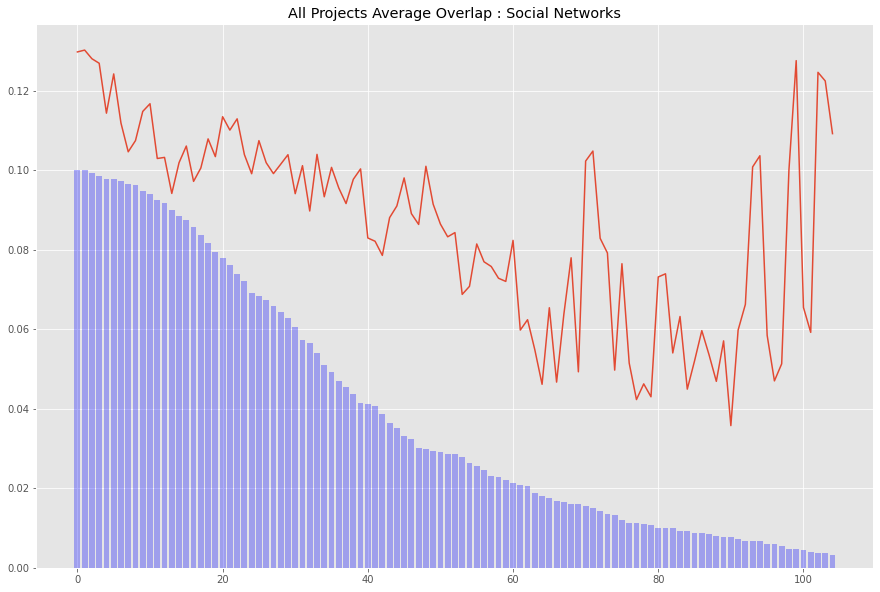

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_social_overlaps.index))]
count = [0 for i in range(len(df_social_overlaps.index))]

for col in df_social_overlaps.columns:
    data = df_social_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))

plt.plot(x,ave[:i])
plt.title("All Projects Average Overlap : Social Networks")

plt.bar(x,np.array(count[:i])/len(df_social_overlaps.columns)/10, fc='b', alpha=0.3)
#print(ave)
#print(count)
plt.show()

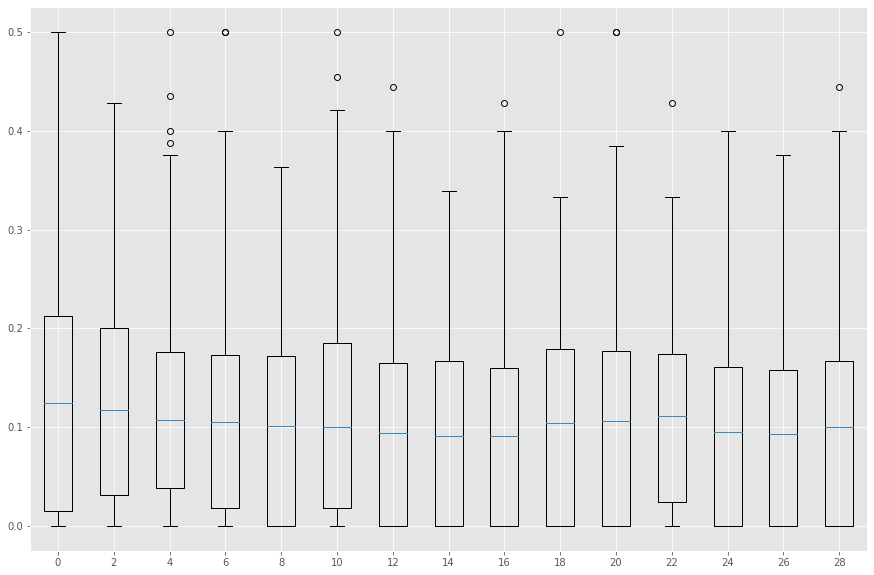

In [10]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t = []
labels_time = range(0,30,2)
for time in labels_time:
    data_thistime = df_social_overlaps.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t.append(data_thistime)




plt.boxplot(datas_t, labels=labels_time)
plt.show()

In [11]:
df_incubating = pd.read_csv('/mnt/data0/lkyin/incubating.csv')
df_graduated = pd.read_csv('/mnt/data0/lkyin/graduated.csv')
df_retired = pd.read_csv('/mnt/data0/lkyin/retired.csv')

In [12]:
c_path = '/mnt/data0/lkyin/monthly_data/commits/'
projects = os.listdir(c_path)
print("Total:", len(projects), "months")

proj_names = []
proj_ids= []
proj_status = []
for project in tqdm(projects):
    project_name, period = project.replace('.csv', '').split('__')
    proj_ids.append(project_name)
    if project_name in df_incubating["alias"].values :
        proj_status.append("incubating")
        proj_names.append(str(df_incubating.loc[df_incubating["alias"] == project_name]["project_name"].values[0]))
    elif project_name in df_graduated["alias"].values :
        proj_status.append('graduated')
        proj_names.append(str(df_graduated.loc[df_graduated["alias"] == project_name]["project_name"].values[0]))
    elif project_name in df_retired["alias"].values :
        proj_status.append('retired')
        proj_names.append(str(df_retired.loc[df_retired["alias"] == project_name]["project_name"].values[0]))
    else:
        proj_status.append('unknown')
        proj_names.append('unknown')

Total: 4327 months


100%|██████████| 4327/4327 [00:01<00:00, 3377.27it/s]


In [13]:
tech_proj_names = pd.Series(proj_names)
print(tech_proj_names.describe())

tech_proj_ids = pd.Series(proj_ids)

tech_proj_status = pd.Series(proj_status)
print(tech_proj_status.unique())

df_proj_tech = pd.DataFrame()
df_proj_tech['project_name'] = tech_proj_names
df_proj_tech['project_aliase'] = tech_proj_ids
df_proj_tech['project_status'] = tech_proj_status

df_proj_tech = df_proj_tech.drop_duplicates()
df_proj_tech.describe()

count        4327
unique        263
top       JSPWiki
freq           63
dtype: object
['retired' 'graduated']


,project_name,project_aliase,project_status
count,263,263,263
unique,263,263,2
top,Taverna,taverna,graduated
freq,1,1,204


In [14]:
all_graduated = df_proj_tech.where(df_proj_tech['project_status']=='graduated')["project_name"].dropna().unique().tolist()
for col in all_graduated:
    if col not in df_tech_overlaps:
        all_graduated.remove(col)
    elif col not in df_social_overlaps:
        all_graduated.remove(col)
len(all_graduated)
#print(all_graduated)

204

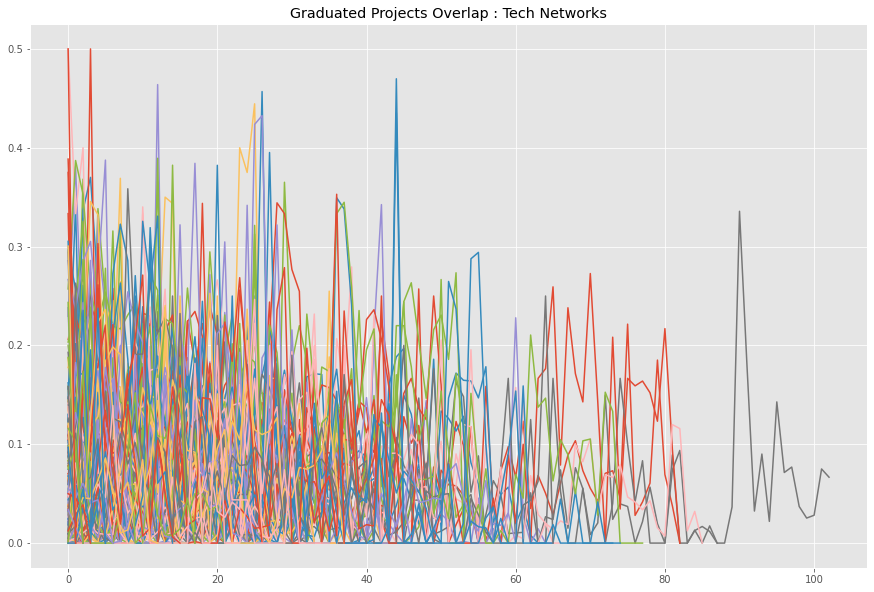

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

for col in all_graduated:
    #print(col)
    data = df_tech_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
    #print(data[:i])

    x = range(len(data[:i]))

    plt.plot(x,data[:i])
    plt.title("Graduated Projects Overlap : Tech Networks")
    

<BarContainer object of 103 artists>

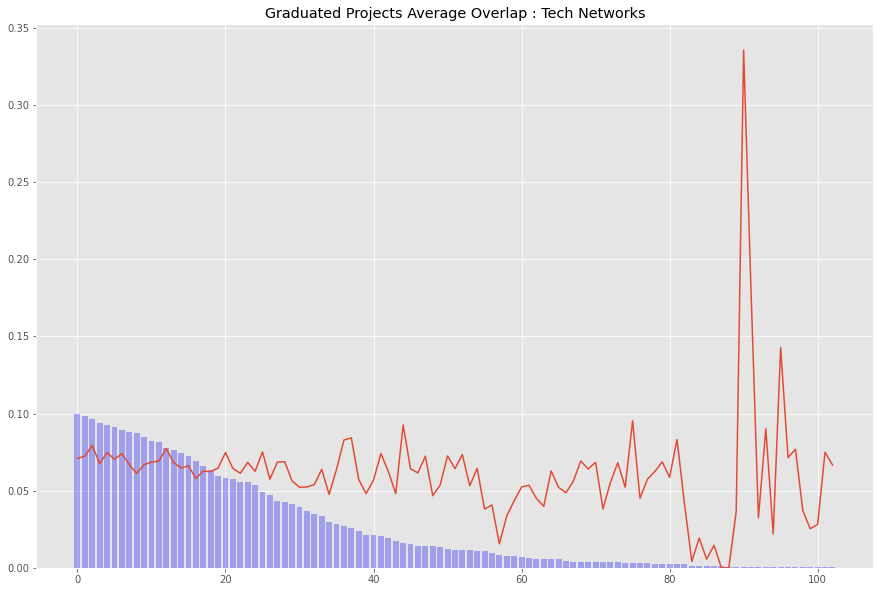

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_tech_overlaps.index))]
count = [0 for i in range(len(df_tech_overlaps.index))]

for col in all_graduated:
    data = df_tech_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))

plt.plot(x,ave[:i])

plt.title("Graduated Projects Average Overlap : Tech Networks")

#print(ave)
#print(count)
len(df_tech_overlaps.loc[0].values)
plt.bar(x,np.array(count[:i])/len(all_graduated)/10, fc='b', alpha=0.3)
#plt.boxplot([df_tech_overlaps.loc[0].values], label=[0])

Text(0.5, 1.0, 'Graduated Projects Average Overlap : Tech Networks')

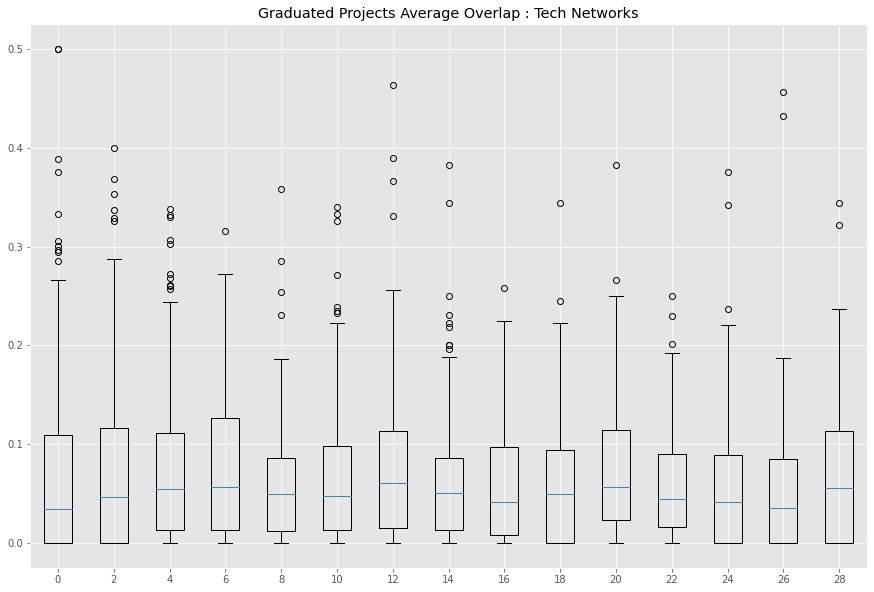

In [17]:
df_tech_overlaps_graduated = df_tech_overlaps[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t = []
labels_time = range(0,30,2)
for time in labels_time:
    data_thistime = df_tech_overlaps_graduated.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t.append(data_thistime)



plt.boxplot(datas_t, labels=labels_time)
plt.title("Graduated Projects Average Overlap : Tech Networks")

<BarContainer object of 105 artists>

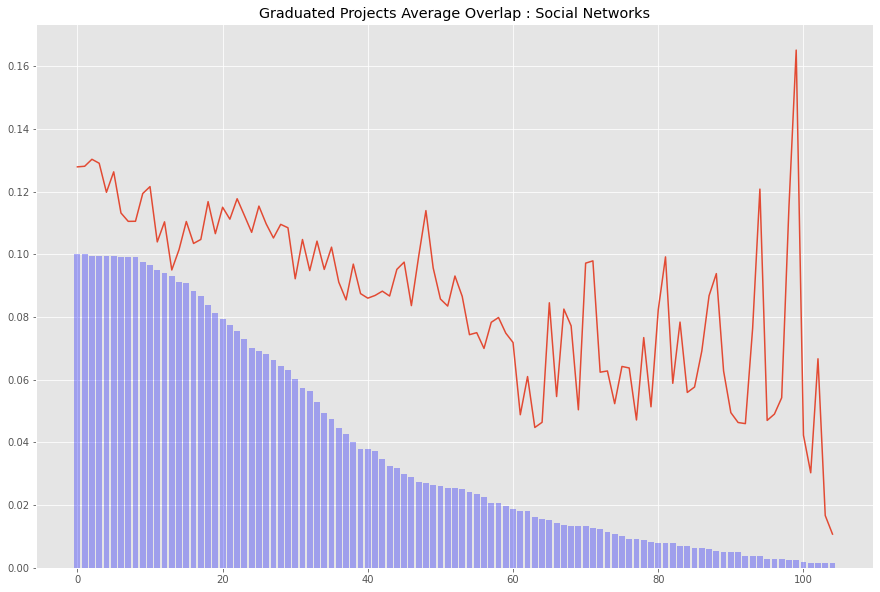

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_social_overlaps.index))]
count = [0 for i in range(len(df_social_overlaps.index))]
for col in all_graduated:
    data = df_social_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))

plt.plot(x,ave[:i])
plt.title("Graduated Projects Average Overlap : Social Networks")

plt.bar(x,np.array(count[:i])/len(all_graduated)/10, fc='b', alpha=0.3)
#print(ave)
#print(count)

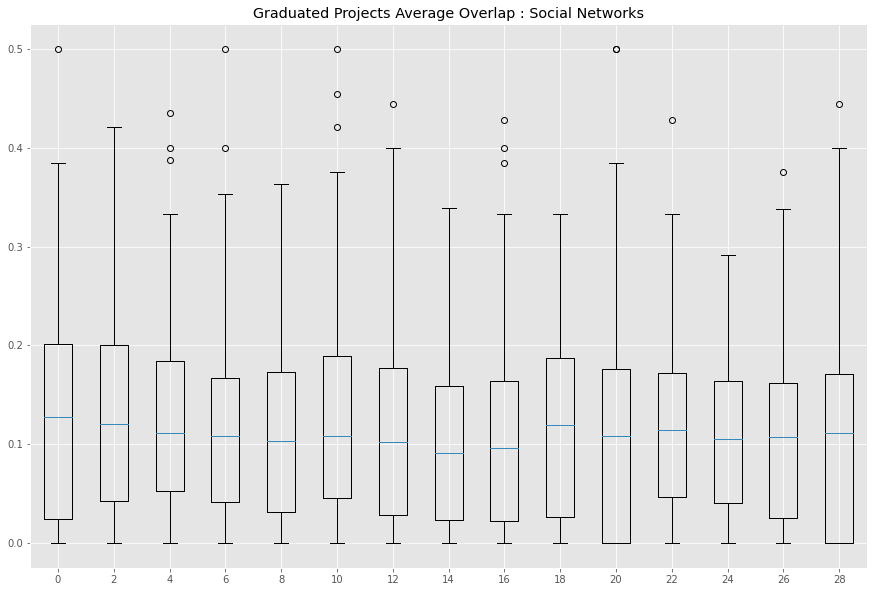

In [19]:
df_social_overlaps_graduated = df_social_overlaps[all_graduated]

plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t = []
labels_time = range(0,30,2)
for time in labels_time:
    data_thistime = df_social_overlaps_graduated.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t.append(data_thistime)



plt.title("Graduated Projects Average Overlap : Social Networks")
plt.boxplot(datas_t, labels=labels_time)
plt.show()

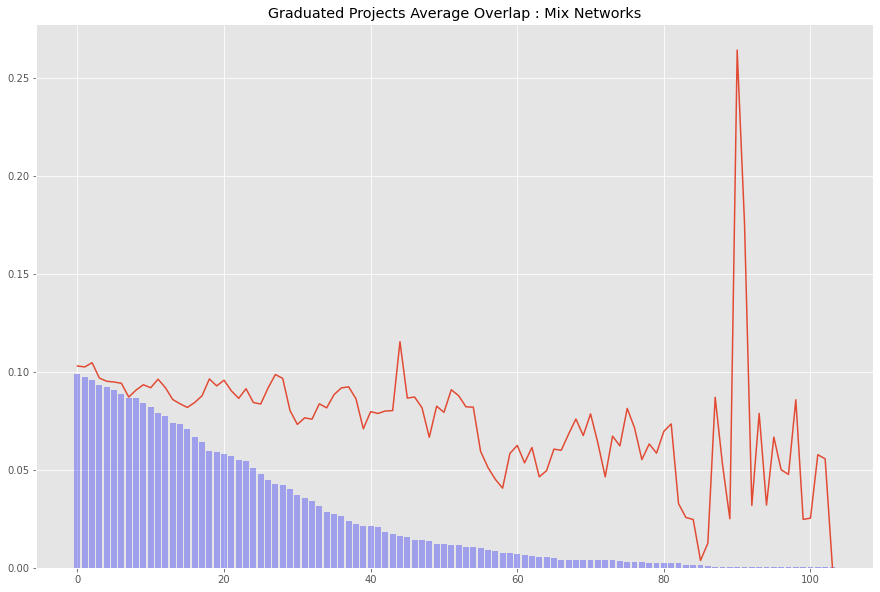

In [21]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_mix_overlaps.index))]
count = [0 for i in range(len(df_mix_overlaps.index))]

for col in all_graduated:
    if not col in df_mix_overlaps.columns:
        continue
    data = df_mix_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))

plt.plot(x,ave[:i])
plt.title("Graduated Projects Average Overlap : Mix Networks")

plt.bar(x,np.array(count[:i])/len(all_graduated)/10, fc='b', alpha=0.3)
#print(ave)
#print(count)
plt.show()

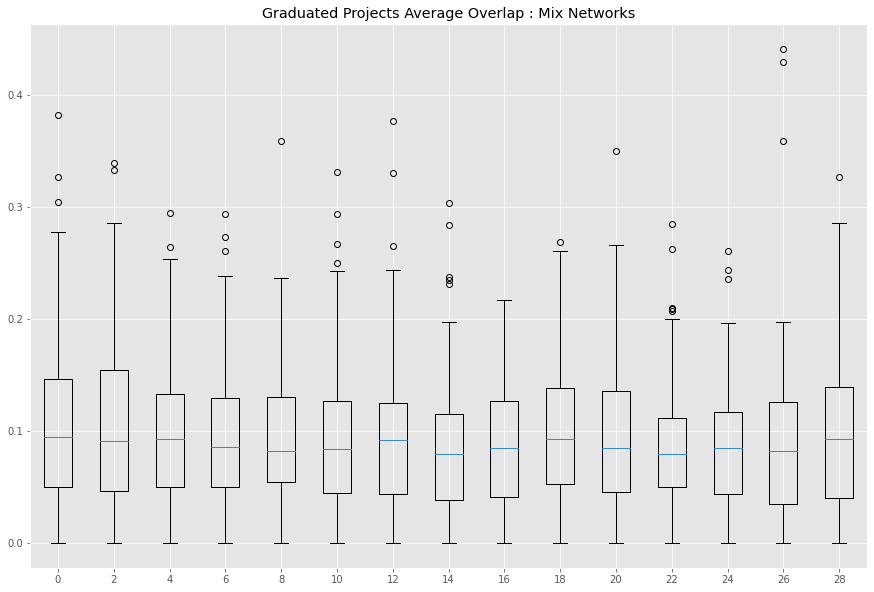

In [30]:
df_mix_overlaps_graduated = df_mix_overlaps[all_graduated]

plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t = []
labels_time = range(0,30,2)
for time in labels_time:
    data_thistime = df_mix_overlaps_graduated.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t.append(data_thistime)



plt.title("Graduated Projects Average Overlap : Mix Networks")
plt.boxplot(datas_t, labels=labels_time)
plt.show()

In [31]:
all_retired = df_proj_tech.where(df_proj_tech['project_status']=='retired')["project_name"].dropna().unique().tolist()

for col in all_retired:
    if col not in df_tech_overlaps:
        all_retired.remove(col)
    elif col not in df_social_overlaps:
        all_retired.remove(col)
#len(all_graduated)
#print(all_graduated)
len(all_retired)
#print(all_graduated)

57

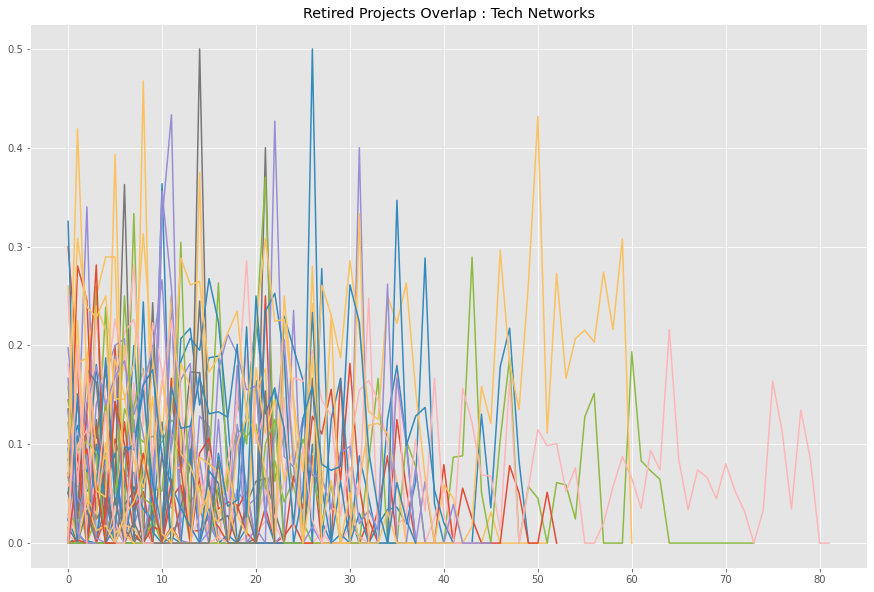

In [32]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

for col in all_retired:
    #print(col)
    data = df_tech_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
    #print(data[:i])

    x = range(len(data[:i]))

    plt.plot(x,data[:i])
    plt.title("Retired Projects Overlap : Tech Networks")
    

<BarContainer object of 82 artists>

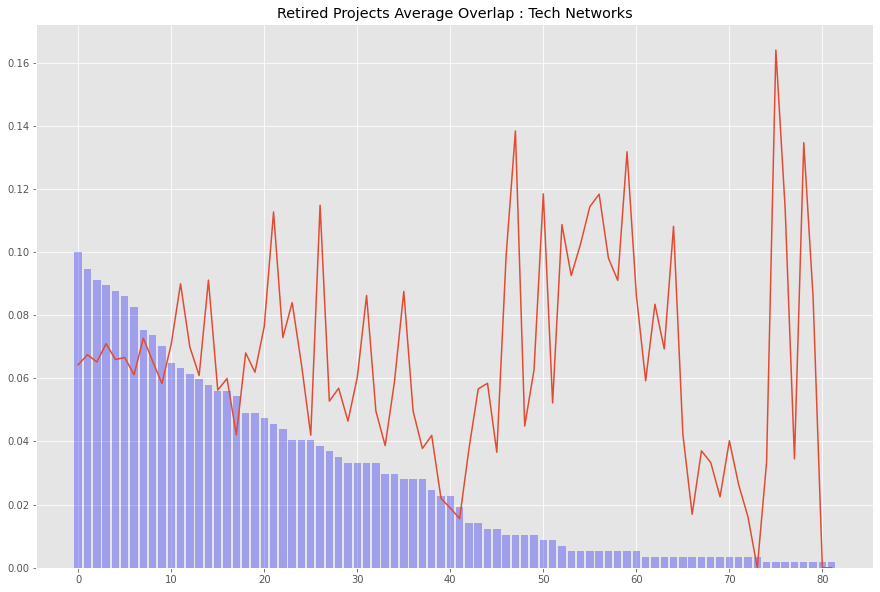

In [33]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_tech_overlaps.index))]
count = [0 for i in range(len(df_tech_overlaps.index))]

for col in all_retired:
    data = df_tech_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))

plt.plot(x,ave[:i])

plt.title("Retired Projects Average Overlap : Tech Networks")

#print(ave)
#print(count)
len(df_tech_overlaps.loc[0].values)
plt.bar(x,np.array(count[:i])/len(all_retired)/10, fc='b', alpha=0.3)
#plt.boxplot([df_tech_overlaps.loc[0].values], label=[0])

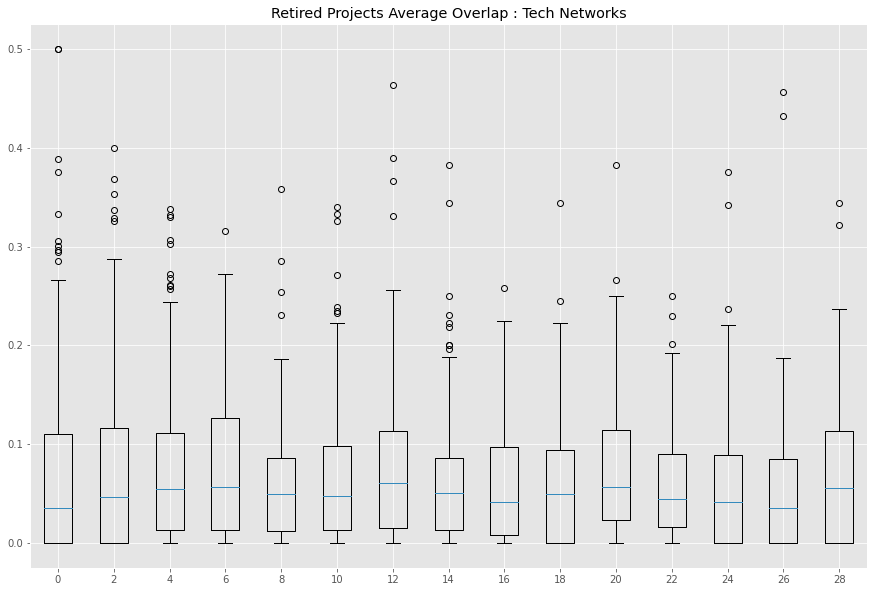

In [34]:
df_tech_overlaps_graduated = df_tech_overlaps[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t = []
labels_time = range(0,30,2)
for time in labels_time:
    data_thistime = df_tech_overlaps_graduated.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t.append(data_thistime)



plt.boxplot(datas_t, labels=labels_time)
plt.title("Retired Projects Average Overlap : Tech Networks")
plt.show()

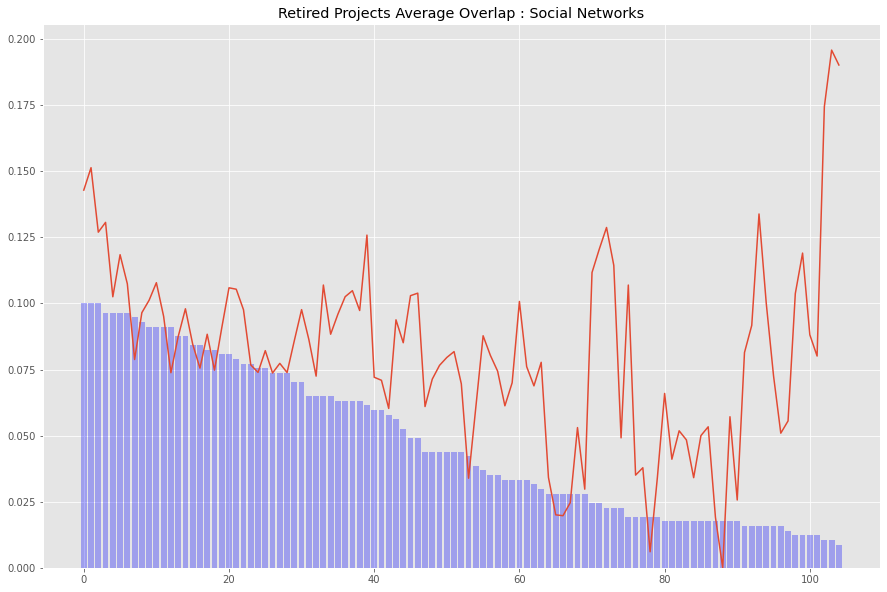

In [35]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_social_overlaps.index))]
count = [0 for i in range(len(df_social_overlaps.index))]

for col in all_retired:
    if col not in df_social_overlaps.columns:
        continue
    data = df_social_overlaps[col].values.tolist()
    flag = False
    for i in range(len(ave)):
        if data[i]==-1.0:
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break

    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))

plt.plot(x,ave[:i])
plt.title("Retired Projects Average Overlap : Social Networks")

plt.bar(x,np.array(count[:i])/len(all_retired)/10, fc='b', alpha=0.3)
#print(ave)
#print(count)
plt.show()

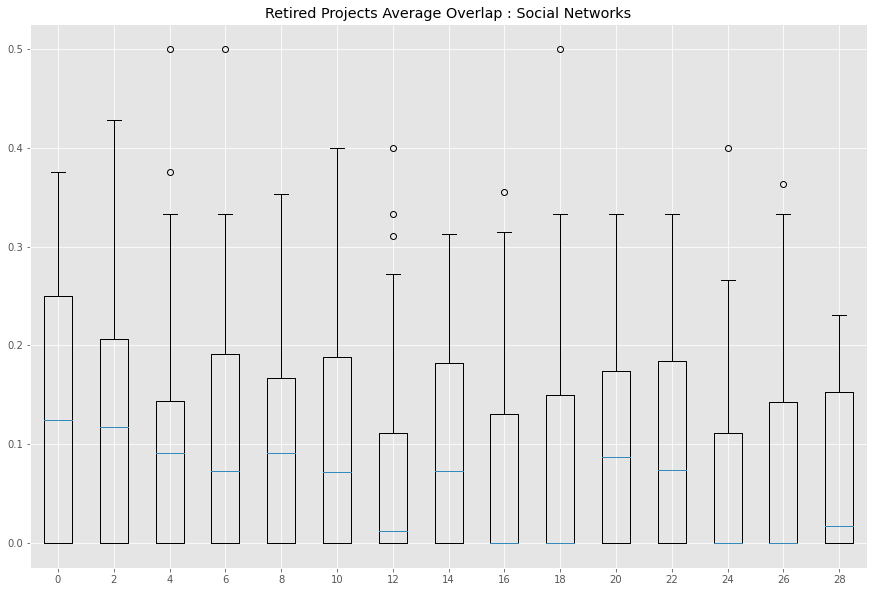

In [36]:
df_social_overlaps_retired = df_social_overlaps[all_retired]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t = []
labels_time = range(0,30,2)
for time in labels_time:
    data_thistime = df_social_overlaps_retired.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t.append(data_thistime)



plt.boxplot(datas_t, labels=labels_time)
plt.title("Retired Projects Average Overlap : Social Networks")
plt.show()

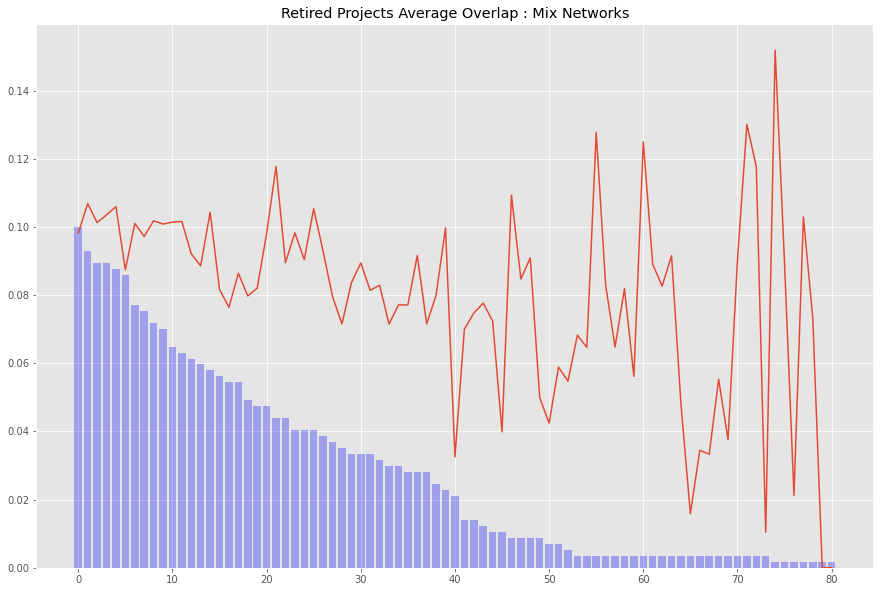

In [37]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_mix_overlaps.index))]
count = [0 for i in range(len(df_mix_overlaps.index))]

for col in all_retired:
    data = df_mix_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))

plt.plot(x,ave[:i])
plt.title("Retired Projects Average Overlap : Mix Networks")

plt.bar(x,np.array(count[:i])/len(all_retired)/10, fc='b', alpha=0.3)
#print(ave)
#print(count)
plt.show()

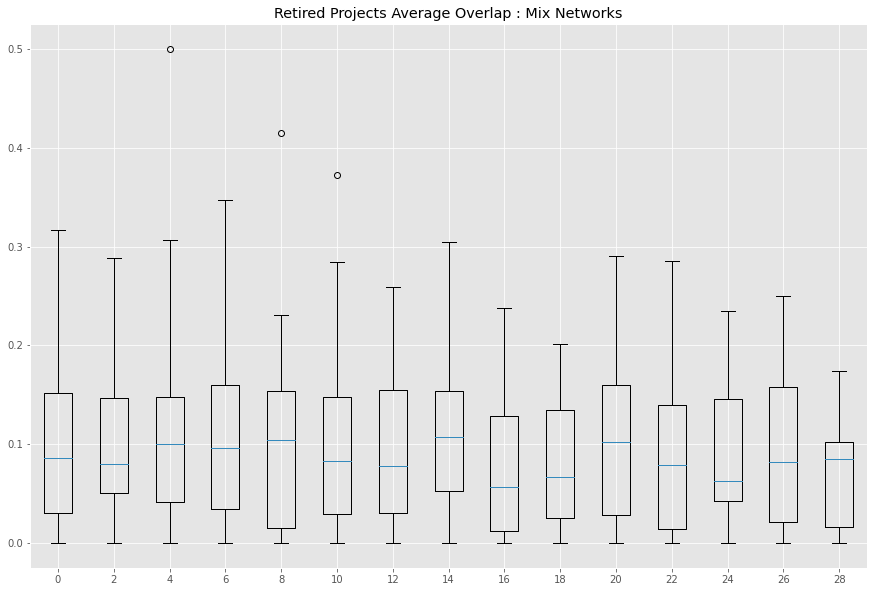

In [38]:
df_mix_overlaps_retired = df_mix_overlaps[all_retired]

plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t = []
labels_time = range(0,30,2)
for time in labels_time:
    data_thistime = df_mix_overlaps_retired.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t.append(data_thistime)



plt.title("Retired Projects Average Overlap : Mix Networks")
plt.boxplot(datas_t, labels=labels_time)
plt.show()

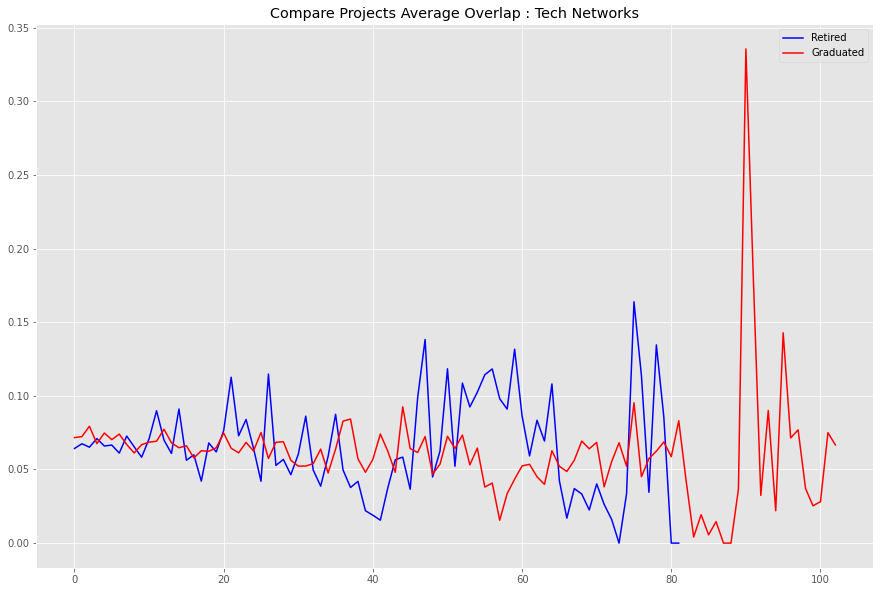

In [39]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_tech_overlaps.index))]
count = [0 for i in range(len(df_tech_overlaps.index))]

for col in all_retired:
    data = df_tech_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))
d1 = ave[:i]

plt.plot(x,d1,color = 'b', label = "Retired")


ave = [0 for i in range(len(df_tech_overlaps.index))]
count = [0 for i in range(len(df_tech_overlaps.index))]

for col in all_graduated:
    data = df_tech_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))
d2 = ave[:i]
plt.plot(x,d2,color = 'r', label = 'Graduated')
plt.title("Compare Projects Average Overlap : Tech Networks")

#print(ave)
#print(count)
#plt.bar(x,np.array(count[:i])/len(all_graduated)/10, fc='b', alpha=0.3)
plt.legend(loc='upper right')

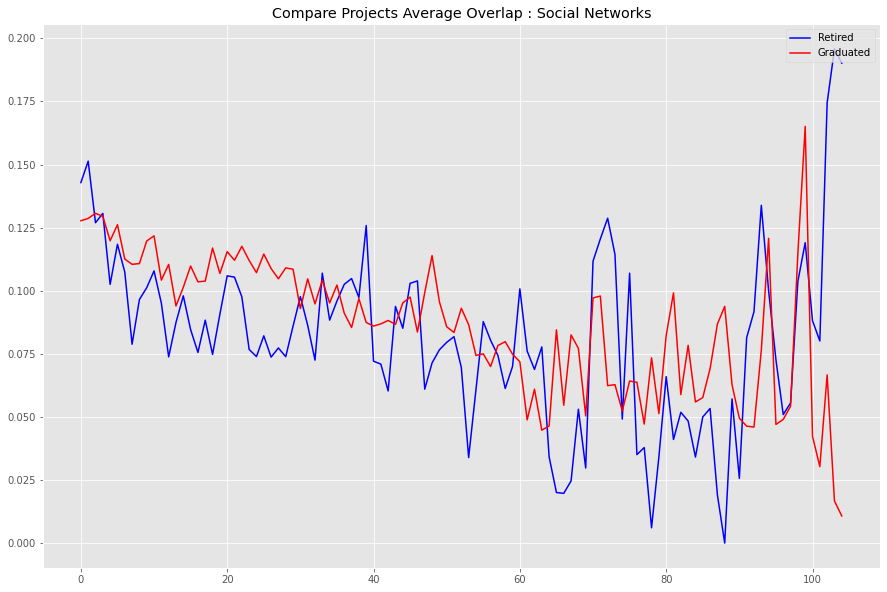

In [40]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_social_overlaps.index))]
count = [0 for i in range(len(df_social_overlaps.index))]

for col in all_retired:
    if col not in df_social_overlaps.columns:
        continue
    data = df_social_overlaps[col].values.tolist()
    flag = False
    for i in range(len(ave)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))
d1 = ave[:i]

plt.plot(x,d1,color = 'b', label = "Retired")

ave = [0 for i in range(len(df_social_overlaps.index))]
count = [0 for i in range(len(df_social_overlaps.index))]
for col in all_graduated:
    data = df_social_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))
d2 = ave[:i]
plt.plot(x,d2,color = 'r', label = 'Graduated')
plt.title("Compare Projects Average Overlap : Social Networks")

#print(ave)
#print(count)
#plt.bar(x,np.array(count[:i])/len(all_graduated)/10, fc='b', alpha=0.3)
plt.legend(loc='upper right')

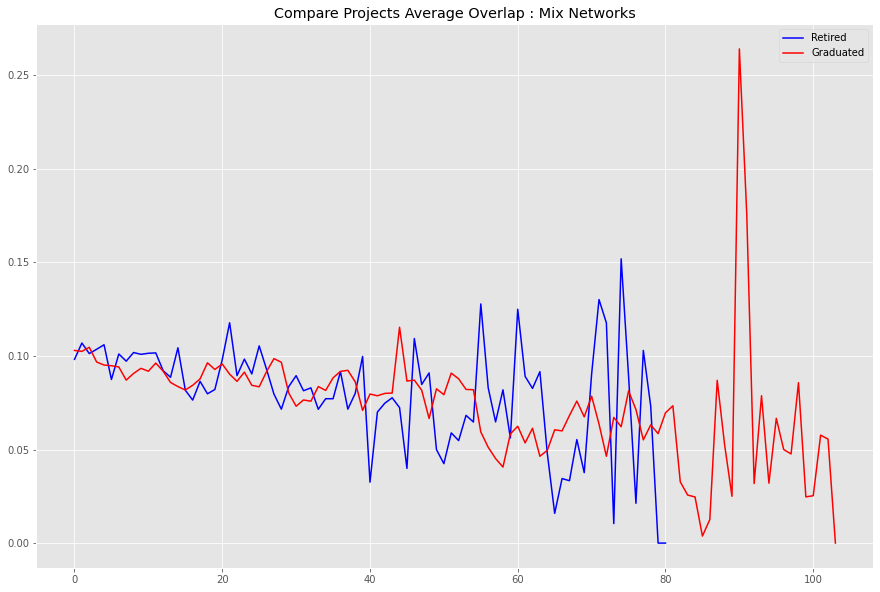

In [41]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_mix_overlaps.index))]
count = [0 for i in range(len(df_mix_overlaps.index))]

for col in all_retired:
    if col not in df_mix_overlaps.columns:
        continue
    data = df_mix_overlaps[col].values.tolist()
    flag = False
    for i in range(len(ave)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))
d1 = ave[:i]

plt.plot(x,d1,color = 'b', label = "Retired")


ave = [0 for i in range(len(df_mix_overlaps.index))]
count = [0 for i in range(len(df_mix_overlaps.index))]

for col in all_graduated:
    data = df_mix_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))
d2 = ave[:i]
plt.plot(x,d2,color = 'r', label = 'Graduated')
plt.title("Compare Projects Average Overlap : Mix Networks")

#print(ave)
#print(count)
#plt.bar(x,np.array(count[:i])/len(all_graduated)/10, fc='b', alpha=0.3)
plt.legend(loc='upper right')

In [42]:
df_tech_overlaps_graduated = df_tech_overlaps[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []
labels_time = range(0,30,2)
for time in labels_time:
    data_thistime = df_tech_overlaps_graduated.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})

df_tech_overlaps_retired = df_tech_overlaps[all_retired]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
labels_time = range(0,30,2)
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_tech_overlaps_retired.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t_retired.append(data_thistime)


df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : Tech Networks")

range(0, 30, 2)


<Figure size 1080x720 with 0 Axes>

In [43]:
df.head(10)

,Time,Graduated,Retired
0,0,"[0.0703125, 0.1036866359447004, 0.03125, 0.0, ...","[0.0, 0.05, 0.1976401179941003, 0.144736842105..."
1,2,"[0.1590909090909091, 0.1109677419354838, 0.0, ...","[0.0, 0.0526315789473684, 0.3402061855670103, ..."
2,4,"[0.0951086956521739, 0.1149110807113543, 0.0, ...","[0.1428571428571428, 0.0, 0.0, 0.0129870129870..."
3,6,"[0.0206422018348623, 0.1070038910505836, 0.039...","[0.0147058823529411, 0.0, 0.0416666666666666, ..."
4,8,"[0.1014492753623188, 0.1451612903225806, 0.076...","[0.0185185185185185, 0.0, 0.1095890410958904, ..."
5,10,"[0.0460251046025104, 0.1211699164345403, 0.0, ...","[0.0, 0.3636363636363636, 0.0, 0.0, 0.10211267..."
6,12,"[0.0235294117647058, 0.0907563025210084, 0.0, ...","[0.0, 0.2068965517241379, 0.0204081632653061, ..."
7,14,"[0.0654205607476635, 0.0795660036166365, 0.125...","[0.0666666666666666, 0.1395348837209302, 0.172..."
8,16,"[0.016260162601626, 0.0473484848484848, 0.0384...","[0.0, 0.1891891891891892, 0.0, 0.0, 0.0, 0.0, ..."
9,18,"[0.0427350427350427, 0.0557377049180327, 0.06,...","[0.0, 0.0277777777777777, 0.0544217687074829, ..."


In [44]:
df = df.explode("Graduated")
df = df.explode("Retired")

Text(0.5, 1.0, 'Compare Projects Average Overlap : Tech Networks')

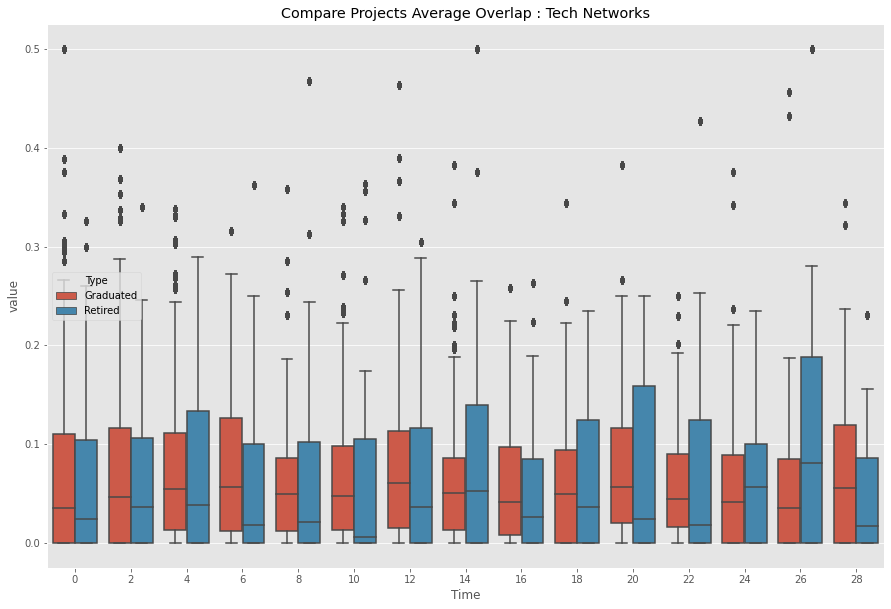

In [45]:
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')

plt.title("Compare Projects Average Overlap : Tech Networks")

In [46]:
df_social_overlaps_graduated = df_social_overlaps[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []
labels_time = range(0,30,2)
for time in labels_time:
    data_thistime = df_social_overlaps_graduated.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
df_social_overlaps_retired = pd.DataFrame()
for col in all_retired:
    if col not in df_social_overlaps.columns:
        continue
    df_social_overlaps_retired[col] = df_social_overlaps[col]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
labels_time = range(0,30,2)
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_social_overlaps_retired.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t_retired.append(data_thistime)


df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : social Networks")

range(0, 30, 2)


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Projects Average Overlap : Social Networks')

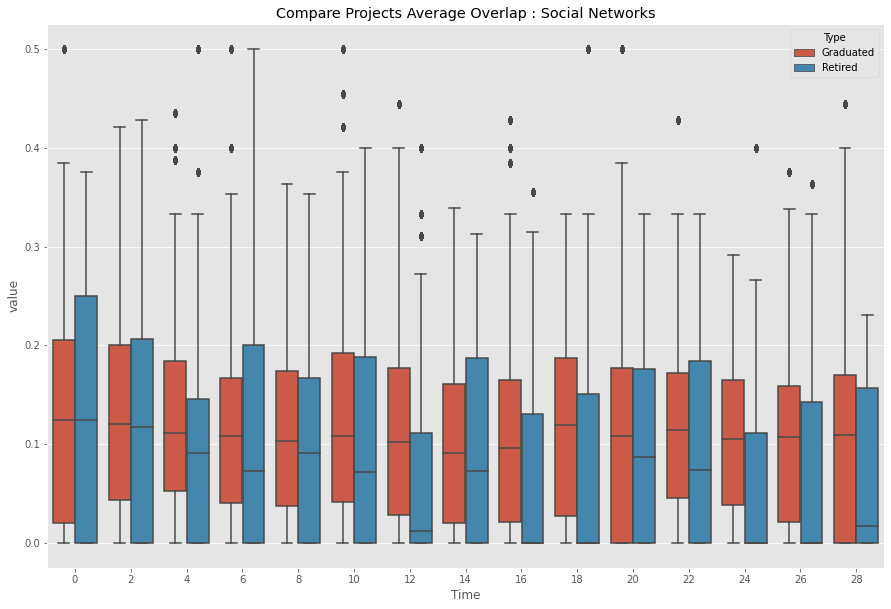

In [47]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')

plt.title("Compare Projects Average Overlap : Social Networks")

In [48]:
df_mix_overlaps_graduated = df_mix_overlaps[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []
labels_time = range(0,30,2)
for time in labels_time:
    data_thistime = df_mix_overlaps_graduated.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
df_mix_overlaps_retired = pd.DataFrame()
for col in all_retired:
    if col not in df_mix_overlaps.columns:
        continue
    df_mix_overlaps_retired[col] = df_mix_overlaps[col]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
labels_time = range(0,30,2)
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_mix_overlaps_retired.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t_retired.append(data_thistime)


df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : social Networks")

range(0, 30, 2)


<Figure size 1080x720 with 0 Axes>

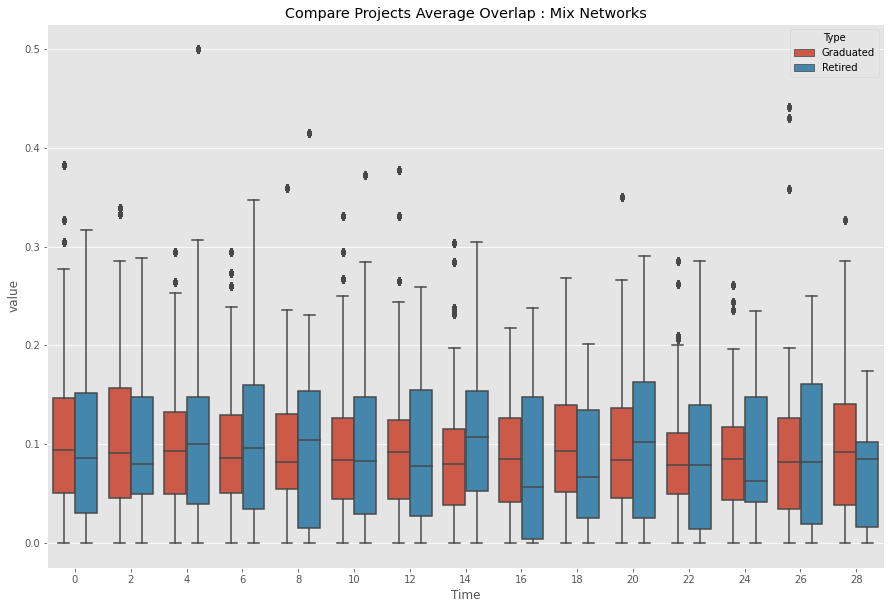

In [49]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')

plt.title("Compare Projects Average Overlap : Mix Networks")
plt.show()